<img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/bgsedsc_0.jpg">

# Supervised Learning Project, Regression: Length of Stay 

In this project, you have to predict the lenght of stay of a patient in an ICU (Intensive Care Unit).

# Step 01 - Import Libraries

In [29]:
# import libraries

# to manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt

# for feature scalling
from sklearn.preprocessing import StandardScaler

# to split data into training and testing
from sklearn.model_selection import train_test_split

# to train the dataset
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# to evaluate model
from sklearn.metrics import mean_absolute_error

# Step 02 - Load Data

In [30]:
# load data 
data=pd.read_csv(r"train_los.csv")

# load data 
test_data=pd.read_csv(r"test_los.csv")

print("\nLOS Data")
print("========\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
data.head()



LOS Data



,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,ADMITTIME,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778,F,1938-11-23,2008-06-15,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761
1,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,F,1929-04-30,2008-09-12,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654
2,86233,184606,237514,62.0,100.0,82.862069,62.0,154.0,114.642857,34.0,113.0,56.964286,48.0,122.0,72.750000,11.0,26.0,18.878788,36.111111,37.722222,36.907407,87.0,100.0,96.931034,116.0,183.0,142.166667,F,1935-05-15,2009-05-21,ELECTIVE,Medicare,PROTESTANT QUAKER,MARRIED,WHITE,LEFT LUNG CANCER/SDA,1625,SICU,9.8213
3,53787,174772,244413,84.0,109.0,94.652174,81.0,163.0,121.727273,29.0,77.0,47.909091,49.0,87.0,65.727273,15.0,25.0,19.869565,35.611111,36.944444,36.203704,89.0,100.0,92.913043,233.0,484.0,361.000000,F,1937-01-14,2008-02-06,EMERGENCY,Medicare,CATHOLIC,DIVORCED,WHITE,ASTHMA;COPD EXACERBATION,49322,MICU,1.0230
4,99384,168087,298919,74.0,98.0,81.142857,84.0,140.0,113.875000,35.0,72.0,54.343750,31.0,81.0,66.806452,17.0,28.0,23.264706,35.888889,37.111111,36.652778,88.0,99.0,94.600000,85.0,161.0,112.000000,M,1924-08-05,2010-02-24,EMERGENCY,Medicare,BUDDHIST,WIDOWED,WHITE,PULMONARY EMBOLISM,41511,TSICU,1.3265


# Step 03 - Data Analysis / Understand Data

In [31]:
# understand data

# print attributes / column names of dataset
print("Attributes / Columns names in Lung Cancer dataset")
print("=================================================\n")
print(data.columns)

# total numnber of instances and columns in dataset
print("\nNumber of instances and columns in LOS Data  " )
print("===========================================\n")
print(data.shape)


Attributes / Columns names in Lung Cancer dataset

Index(['subject_id', 'hadm_id', 'icustay_id', 'HeartRate_Min', 'HeartRate_Max',
       'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min',
       'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
       'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min',
       'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean',
       'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'GENDER', 'DOB',
       'ADMITTIME', 'ADMISSION_TYPE', 'INSURANCE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'ICD9_diagnosis',
       'FIRST_CAREUNIT', 'LOS'],
      dtype='object')

Number of instances and columns in LOS Data  

(13840, 39)


### Categorical Features

In [32]:
# find all categorical features from LOS dataset
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O' and feature not in ['DOB','ADMITTIME']]

print('Number of categorical features: ', len(categorical_features))
print("===================================")

# display the categorical features
data[categorical_features].head()

Number of categorical features:  9


,GENDER,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
0,F,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU
1,F,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU
2,F,ELECTIVE,Medicare,PROTESTANT QUAKER,MARRIED,WHITE,LEFT LUNG CANCER/SDA,1625,SICU
3,F,EMERGENCY,Medicare,CATHOLIC,DIVORCED,WHITE,ASTHMA;COPD EXACERBATION,49322,MICU
4,M,EMERGENCY,Medicare,BUDDHIST,WIDOWED,WHITE,PULMONARY EMBOLISM,41511,TSICU


In [33]:
# check number of unique values in all categorical features

for feature in categorical_features:
    print(f'{feature} : Unique Values(Categories) {len(data[feature].unique())}')

GENDER : Unique Values(Categories) 2
ADMISSION_TYPE : Unique Values(Categories) 3
INSURANCE : Unique Values(Categories) 5
RELIGION : Unique Values(Categories) 16
MARITAL_STATUS : Unique Values(Categories) 8
ETHNICITY : Unique Values(Categories) 41
DIAGNOSIS : Unique Values(Categories) 4418
ICD9_diagnosis : Unique Values(Categories) 1552
FIRST_CAREUNIT : Unique Values(Categories) 5


### Relationship between Categorical Features and Dependant Feature (LOS)

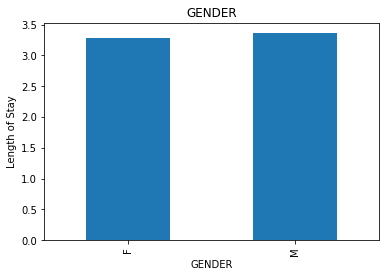

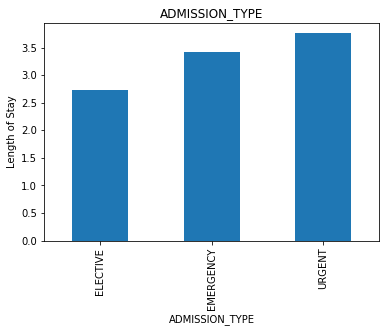

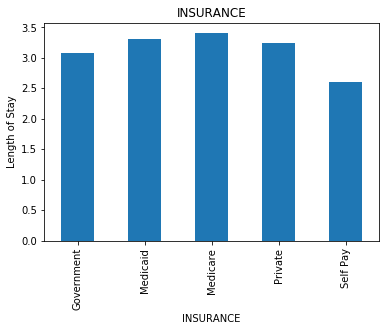

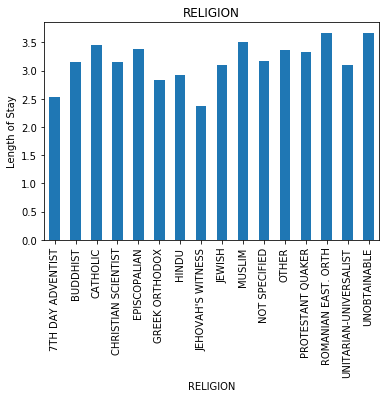

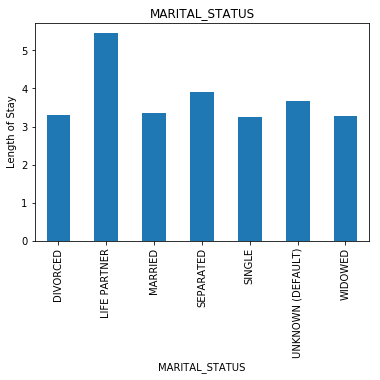

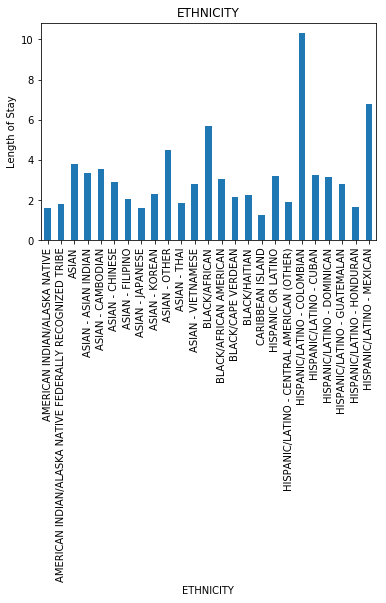

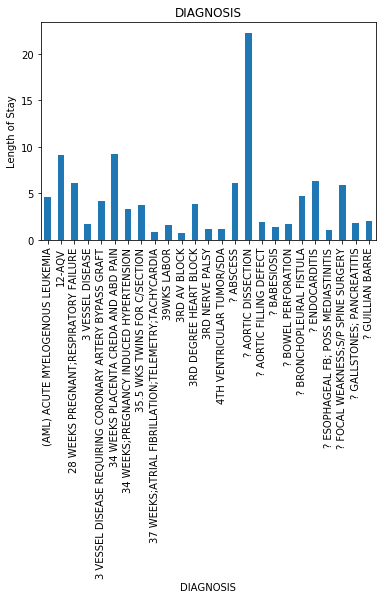

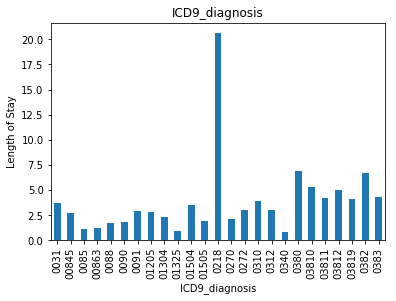

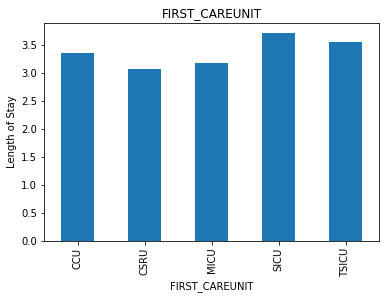

In [34]:
# relationship between categorical features and dependant feature (LOS) using bar chart
for feature in categorical_features:
    cat_data=data.copy()
    cat_data.groupby(feature)['LOS'].mean().head(25).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Length of Stay')
    plt.title(feature)
    plt.show()



### Numerical Features

In [35]:
# find all numerical features from LOS dataset
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical features: ', len(numerical_features))
print("==================================")

# display the numerical features
data[numerical_features].head()

Number of numerical features:  28


,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,LOS
0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778,4.5761
1,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,5.8654
2,86233,184606,237514,62.0,100.0,82.862069,62.0,154.0,114.642857,34.0,113.0,56.964286,48.0,122.0,72.750000,11.0,26.0,18.878788,36.111111,37.722222,36.907407,87.0,100.0,96.931034,116.0,183.0,142.166667,9.8213
3,53787,174772,244413,84.0,109.0,94.652174,81.0,163.0,121.727273,29.0,77.0,47.909091,49.0,87.0,65.727273,15.0,25.0,19.869565,35.611111,36.944444,36.203704,89.0,100.0,92.913043,233.0,484.0,361.000000,1.0230
4,99384,168087,298919,74.0,98.0,81.142857,84.0,140.0,113.875000,35.0,72.0,54.343750,31.0,81.0,66.806452,17.0,28.0,23.264706,35.888889,37.111111,36.652778,88.0,99.0,94.600000,85.0,161.0,112.000000,1.3265


Numeric features are of two types
1. Discrete 
2. Continous

### Discrete Features

In [36]:
# find all discrete features
# subject_id, hadm_id, icustay_id are not required
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in ['subject_id','hadm_id','icustay_id']]
print("Number of discrete features:",len(discrete_features))
print("==============================")
data[discrete_features].head()

Number of discrete features: 1


,SpO2_Max
0,99.0
1,NaN
2,100.0
3,100.0
4,99.0


### Relationship between Discrete Feature and Dependant Feature (LOS)

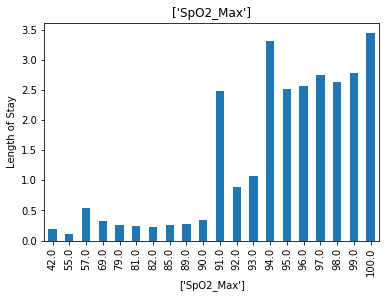

In [37]:
# relationship between discrete features and dependant feature (LOS)
data.groupby(discrete_features)['LOS'].mean().plot.bar()
plt.xlabel(discrete_features)
plt.ylabel('Length of Stay')
plt.title(discrete_features)
plt.show()

### Continous Features

In [38]:
# find all discrete features
# subject_id, hadm_id, icustay_id are not required

continous_features=[feature for feature in numerical_features if feature not in discrete_features+['subject_id','hadm_id','icustay_id']]
print("Number of continous features:",len(continous_features))
print("================================")
data[continous_features].head()

Number of continous features: 24


,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,LOS
0,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,95.739130,111.0,230.0,160.777778,4.5761
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,5.8654
2,62.0,100.0,82.862069,62.0,154.0,114.642857,34.0,113.0,56.964286,48.0,122.0,72.750000,11.0,26.0,18.878788,36.111111,37.722222,36.907407,87.0,96.931034,116.0,183.0,142.166667,9.8213
3,84.0,109.0,94.652174,81.0,163.0,121.727273,29.0,77.0,47.909091,49.0,87.0,65.727273,15.0,25.0,19.869565,35.611111,36.944444,36.203704,89.0,92.913043,233.0,484.0,361.000000,1.0230
4,74.0,98.0,81.142857,84.0,140.0,113.875000,35.0,72.0,54.343750,31.0,81.0,66.806452,17.0,28.0,23.264706,35.888889,37.111111,36.652778,88.0,94.600000,85.0,161.0,112.000000,1.3265


### Relationship between Continous Features and Dependant Feature (LOS)

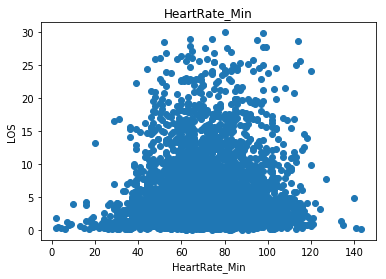

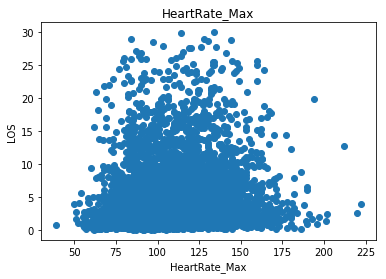

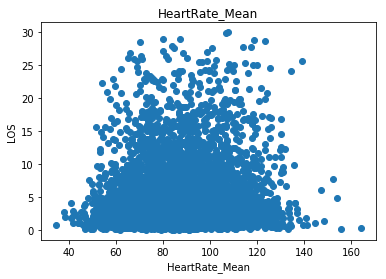

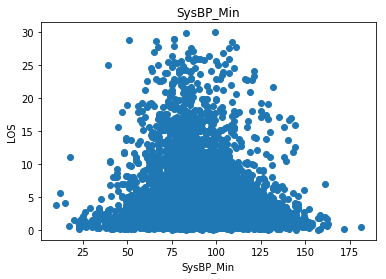

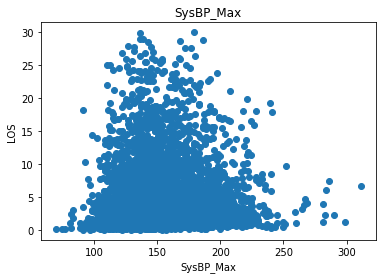

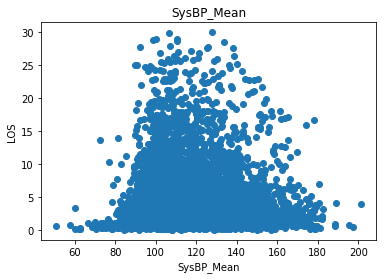

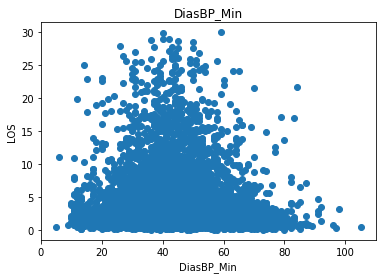

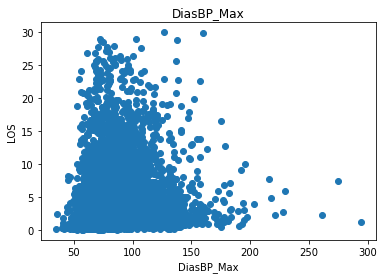

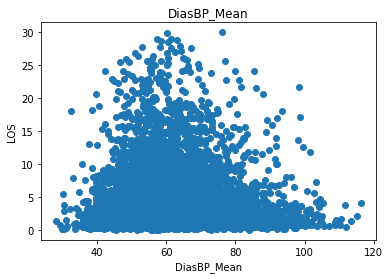

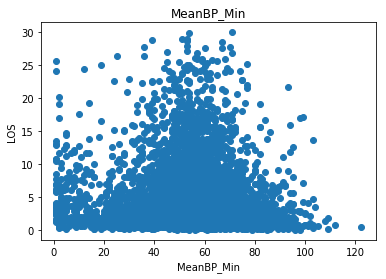

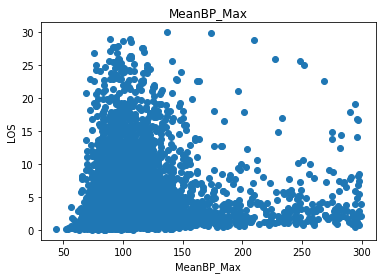

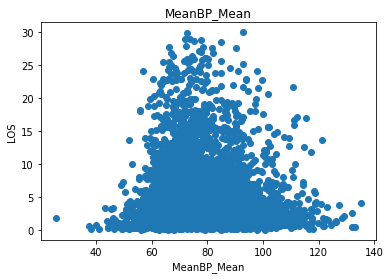

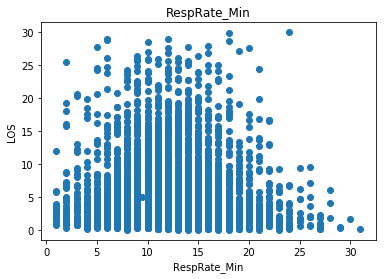

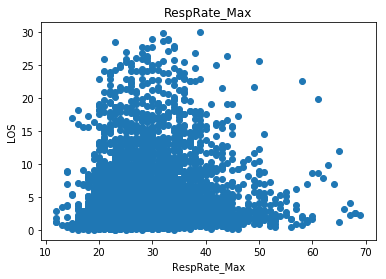

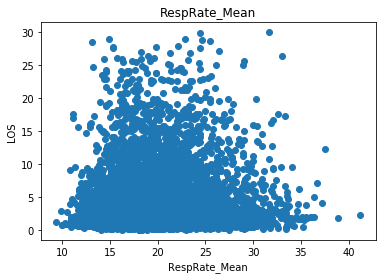

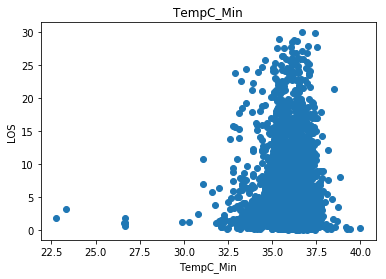

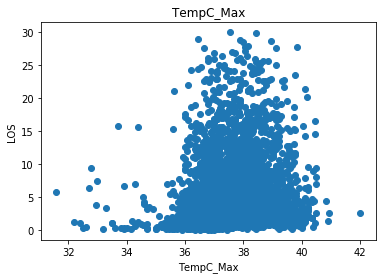

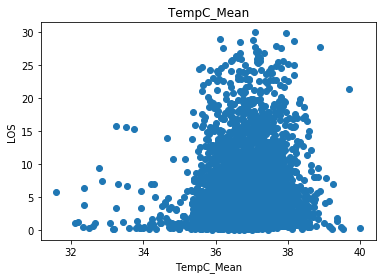

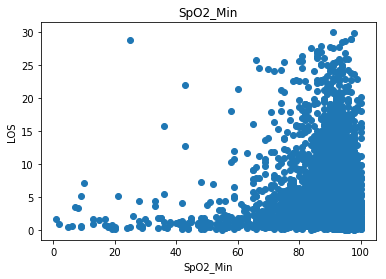

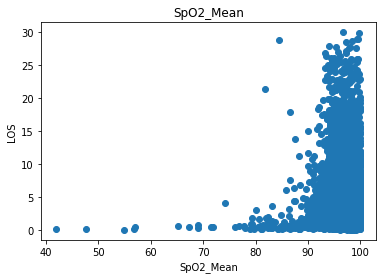

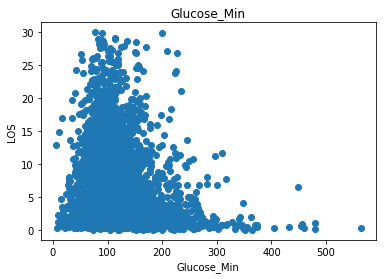

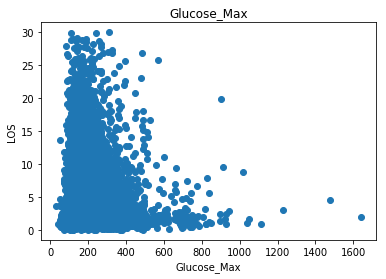

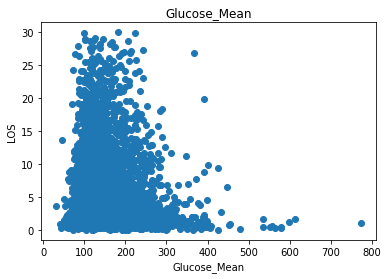

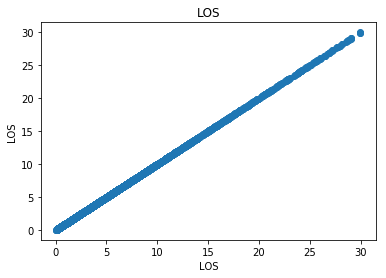

In [39]:
# relationship between continous features and dependant feature (LOS) using scatter chart
for feature in continous_features:
    con_data=data.copy()
    plt.scatter(con_data[feature],con_data['LOS'])
    plt.xlabel(feature)
    plt.ylabel('LOS')
    plt.title(feature)
    plt.show()

From the above graphs we can see that almost all continous features are normally distributed.

### Missing Values

In [40]:
# checking for any null values
print("\nChecking for null values and data types")
print("=======================================")
print(data.info())


Checking for null values and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 39 columns):
subject_id        13840 non-null int64
hadm_id           13840 non-null int64
icustay_id        13840 non-null int64
HeartRate_Min     11177 non-null float64
HeartRate_Max     11177 non-null float64
HeartRate_Mean    11177 non-null float64
SysBP_Min         11164 non-null float64
SysBP_Max         11164 non-null float64
SysBP_Mean        11164 non-null float64
DiasBP_Min        11164 non-null float64
DiasBP_Max        11164 non-null float64
DiasBP_Mean       11164 non-null float64
MeanBP_Min        11177 non-null float64
MeanBP_Max        11177 non-null float64
MeanBP_Mean       11177 non-null float64
RespRate_Min      11175 non-null float64
RespRate_Max      11175 non-null float64
RespRate_Mean     11175 non-null float64
TempC_Min         10995 non-null float64
TempC_Max         10995 non-null float64
TempC_Mean        10995 non-null flo

In [41]:
# list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
print("Features with missing values")
print("============================")
print(features_with_na)

Features with missing values
['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'MARITAL_STATUS']


# Step 04 - Pre-process Data / Data Preparation

In [42]:
# Dropping IDs - not useful as predictors 
data=data.drop(['subject_id', "hadm_id", "icustay_id"], axis = 1)

# Dropping IDs from test data - not useful as predictors 
test_data=test_data.drop(['subject_id', "hadm_id", "icustay_id"], axis = 1)

In [43]:
# create new feature Age by subtracting DOB - AdmissionTimeDate
# converting date to datetime object
data['ADMITTIME'] = pd.to_datetime(data['ADMITTIME'])
data['ADMITTIME'] = pd.DatetimeIndex(data['ADMITTIME']).year
data['DOB'] = pd.to_datetime(data['DOB'])
data['DOB'] = pd.DatetimeIndex(data['DOB']).year
data['AGE']=data['ADMITTIME']-data['DOB']

# create new feature Age for test data by subtracting DOB - AdmissionTimeDate 
# converting date to datetime object
test_data['ADMITTIME'] = pd.to_datetime(test_data['ADMITTIME'])
test_data['ADMITTIME'] = pd.DatetimeIndex(test_data['ADMITTIME']).year
test_data['DOB'] = pd.to_datetime(test_data['DOB'])
test_data['DOB'] = pd.DatetimeIndex(test_data['DOB']).year
test_data['AGE']=test_data['ADMITTIME']-test_data['DOB']

In [44]:
# now drop DOB, ADMITTIME
data=data.drop(['DOB','ADMITTIME'],axis=1)

# now drop DOB, ADMITTIME from test data
test_data=test_data.drop(['DOB','ADMITTIME'],axis=1)

### Handle Missing Values of Numerical Features

In [45]:
# Now lets check for numerical variables that contains missing values
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

print(numerical_with_nan)

['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']


In [46]:
# Replacing the numerical Missing Values

for feature in numerical_with_nan:
    # We will replace by using median 
    median_value=data[feature].median()
    data[feature].fillna(median_value,inplace=True)
    
# Replacing the numerical Missing Values from test data

for feature in numerical_with_nan:
    # We will replace by using median 
    median_value_t=test_data[feature].median()
    test_data[feature].fillna(median_value_t,inplace=True)    
    
# Again check for missing values
print("Check missing values of numerical features if exist")
print("===================================================")
data[numerical_with_nan].isnull().sum()

Check missing values of numerical features if exist


HeartRate_Min     0
HeartRate_Max     0
HeartRate_Mean    0
SysBP_Min         0
SysBP_Max         0
SysBP_Mean        0
DiasBP_Min        0
DiasBP_Max        0
DiasBP_Mean       0
MeanBP_Min        0
MeanBP_Max        0
MeanBP_Mean       0
RespRate_Min      0
RespRate_Max      0
RespRate_Mean     0
TempC_Min         0
TempC_Max         0
TempC_Mean        0
SpO2_Min          0
SpO2_Max          0
SpO2_Mean         0
Glucose_Min       0
Glucose_Max       0
Glucose_Mean      0
dtype: int64

### Handle Missing values of Categorical Features

In [47]:
# Now lets check for categorical featurtes that contains missing values
categorical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

print(categorical_with_nan)

['MARITAL_STATUS']


In [48]:
# replace Nan value with mode value
# because there is no much missing values

mode_value=data['MARITAL_STATUS'].mode()[0]
data["MARITAL_STATUS"].fillna(mode_value,inplace=True)

# do same for test data
mode_value_t=test_data['MARITAL_STATUS'].mode()[0]
test_data["MARITAL_STATUS"].fillna(mode_value_t,inplace=True)

# Again check for missing values
print("Check missing values of categorical features if exist")
print("=====================================================")
data[categorical_with_nan].isnull().sum()

Check missing values of categorical features if exist


MARITAL_STATUS    0
dtype: int64

###  Dummy Variables (One Hot Encoding)

In [49]:
# Converting categorical data into dummies
# we will create dummy cariables for those categorical features which has less number of categories
Adm_Type = pd.get_dummies(data['ADMISSION_TYPE'],drop_first=True)
data = data.drop('ADMISSION_TYPE', axis=1)
data= data.join(Adm_Type)

Ethn = pd.get_dummies(data['ETHNICITY'])
data= data.drop('ETHNICITY', axis=1)
Ethn = Ethn["WHITE"]
data = data.join(Ethn)

Ins = pd.get_dummies(data['INSURANCE'],drop_first=True)
data = data.drop('INSURANCE', axis=1)
data = data.join(Ins)

Unit = pd.get_dummies(data['FIRST_CAREUNIT'],drop_first=True)
data = data.drop('FIRST_CAREUNIT', axis=1)
data = data.join(Unit)

Gender = pd.get_dummies(data['GENDER'],drop_first=True)
data = data.drop('GENDER', axis=1)
data = data.join(Gender)

# do same for test data
Adm_Type = pd.get_dummies(test_data['ADMISSION_TYPE'],drop_first=True)
test_data = test_data.drop('ADMISSION_TYPE', axis=1)
test_data= test_data.join(Adm_Type)

Ethn = pd.get_dummies(test_data['ETHNICITY'])
test_data= test_data.drop('ETHNICITY', axis=1)
Ethn = Ethn["WHITE"]
test_data = test_data.join(Ethn)

Ins = pd.get_dummies(test_data['INSURANCE'],drop_first=True)
test_data = test_data.drop('INSURANCE', axis=1)
test_data = test_data.join(Ins)

Unit = pd.get_dummies(test_data['FIRST_CAREUNIT'],drop_first=True)
test_data = test_data.drop('FIRST_CAREUNIT', axis=1)
test_data = test_data.join(Unit)

Gender = pd.get_dummies(test_data['GENDER'],drop_first=True)
test_data = test_data.drop('GENDER', axis=1)
test_data = test_data.join(Gender)

In [50]:
print(data.shape)
test_data.shape

(13840, 42)


(12065, 41)

### Count / Frequency Encoding

In [51]:
# we will do frequency encoding for those categorical features which has greater number of categories

religion_frequency_map = data.RELIGION.value_counts().to_dict()
# replace RELIGION labels in the dataset with their counts
data.RELIGION = data.RELIGION.map(religion_frequency_map)

ms_frequency_map = data.MARITAL_STATUS.value_counts().to_dict()
# replace MERITAL_STATUS labels in the dataset with their counts
data.MARITAL_STATUS = data.MARITAL_STATUS.map(ms_frequency_map)

diagnosis_frequency_map = data.DIAGNOSIS.value_counts().to_dict()
# replace DIAGNOSIS labels in the dataset with their counts
data.DIAGNOSIS = data.DIAGNOSIS.map(diagnosis_frequency_map)

icd_frequency_map = data.ICD9_diagnosis.value_counts().to_dict()
# replace ICD9_diagnosis labels in the dataset with their counts
data.ICD9_diagnosis = data.ICD9_diagnosis.map(icd_frequency_map)


# do same for test data
religion_frequency_map = test_data.RELIGION.value_counts().to_dict()
# replace RELIGION labels in the dataset with their counts
test_data.RELIGION = test_data.RELIGION.map(religion_frequency_map)

ms_frequency_map = test_data.MARITAL_STATUS.value_counts().to_dict()
# replace MERITAL_STATUS labels in the dataset with their counts
test_data.MARITAL_STATUS = test_data.MARITAL_STATUS.map(ms_frequency_map)

diagnosis_frequency_map = test_data.DIAGNOSIS.value_counts().to_dict()
# replace DIAGNOSIS labels in the dataset with their counts
test_data.DIAGNOSIS = test_data.DIAGNOSIS.map(diagnosis_frequency_map)

icd_frequency_map = test_data.ICD9_diagnosis.value_counts().to_dict()
# replace ICD9_diagnosis labels in the dataset with their counts
test_data.ICD9_diagnosis = test_data.ICD9_diagnosis.map(icd_frequency_map)

In [52]:
data.columns

Index(['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'RELIGION', 'MARITAL_STATUS', 'DIAGNOSIS',
       'ICD9_diagnosis', 'LOS', 'AGE', 'EMERGENCY', 'URGENT', 'WHITE',
       'Medicaid', 'Medicare', 'Private', 'Self Pay', 'CSRU', 'MICU', 'SICU',
       'TSICU', 'M'],
      dtype='object')

### Splitting Input and Output Features

In [53]:
# for feature scalling first we will split input and output features
input_features = data.drop("LOS",axis=1)
output_feature = data["LOS"]
output_features=pd.DataFrame(output_feature)


### Feature Scalling

In [54]:
# use standard scalar for scalling
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(input_features)

# for test data
# transform data
scaled_test_data = scaler.fit_transform(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [55]:
input_features_scaled=pd.DataFrame(scaled,columns=['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'RELIGION', 'MARITAL_STATUS', 'DIAGNOSIS',
       'ICD9_diagnosis', 'AGE', 'EMERGENCY', 'URGENT', 'WHITE',
       'Medicaid', 'Medicare', 'Private', 'Self Pay', 'CSRU', 'MICU', 'SICU',
       'TSICU', 'M'])

test_data_scaled=pd.DataFrame(scaled_test_data,columns=['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'RELIGION', 'MARITAL_STATUS', 'DIAGNOSIS',
       'ICD9_diagnosis', 'AGE', 'EMERGENCY', 'URGENT', 'WHITE',
       'Medicaid', 'Medicare', 'Private', 'Self Pay', 'CSRU', 'MICU', 'SICU',
       'TSICU', 'M'])
input_features_scaled.head()

,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,RELIGION,MARITAL_STATUS,DIAGNOSIS,ICD9_diagnosis,AGE,EMERGENCY,URGENT,WHITE,Medicaid,Medicare,Private,Self Pay,CSRU,MICU,SICU,TSICU,M
0,1.451602,2.156100,2.622065,-1.087840,-1.074548,-0.801632,-0.224292,0.116544,-0.128354,0.182940,-0.480153,-0.289443,0.946030,0.429244,1.011424,-1.439083,-0.652586,-1.240716,-0.171146,-0.508193,-0.526755,0.092819,0.561058,0.490850,-0.798325,-0.419533,0.208259,-0.055849,0.328577,0.419727,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,1.186858,-0.481068,-0.380333,-1.135059
1,-0.045346,-0.091374,-0.061459,-0.025617,-0.101291,-0.124882,-0.037926,-0.110307,-0.088347,0.029227,-0.164073,-0.110053,0.017785,-0.099919,-0.145314,0.081467,-0.109396,-0.022905,0.123372,0.303508,0.107062,-0.297313,-0.474360,-0.562711,-1.155503,-1.317984,0.908679,-0.520181,0.846799,0.419727,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,-0.842561,-0.481068,2.629276,-1.135059
2,-0.569278,-0.251908,-0.152707,-1.837644,0.176783,-0.273414,-0.969753,1.420935,-0.548670,-0.662484,0.626129,-0.466203,-0.291631,-0.276307,0.011854,0.081467,0.433794,0.298780,-0.612923,0.303508,0.018353,0.232152,0.037782,0.080451,-0.798325,0.923371,-0.652674,-0.548609,0.558898,-2.382502,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,-0.842561,2.078709,-0.380333,-1.135059
3,1.077365,0.229693,0.704120,-0.650454,0.593893,0.191104,-1.435667,-0.620721,-1.452797,-0.585627,-0.756724,-1.158344,0.946030,-0.452695,0.297337,-0.678808,-0.652586,-1.010941,-0.318405,0.303508,-1.819245,3.492542,3.388974,4.906006,1.068824,-1.756075,0.084226,-0.515442,0.386157,0.419727,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,1.186858,-0.481068,-0.380333,-1.135059
4,0.328891,-0.358931,-0.277647,-0.463002,-0.472055,-0.323762,-0.876570,-0.904284,-0.810321,-1.969048,-0.993785,-1.051983,1.564861,0.076469,1.275614,-0.256433,-0.419790,-0.175132,-0.465664,-0.508193,-1.047728,-0.631712,-0.207155,-0.584763,-1.829524,-1.317984,-0.477569,-0.633894,1.249860,0.419727,-0.107117,0.615101,-0.331323,0.878039,-0.650939,-0.095082,-0.423768,-0.842561,-0.481068,2.629276,0.881011


# Step 05 - Train-test Split

In [56]:
# Splitting Sample Data into Training Data and Testing Data
input_features_train, input_features_test, output_feature_train, output_feature_test = train_test_split(input_features_scaled, output_features, random_state=34, test_size=0.33)

# Step 06 - Train the Algorithms using Training Data

In [57]:
# Train the Support Vector Regressor

print("\n\nTraining the Support Vector Regressor on Training Data")
print("======================================================\n")
svr_model = SVR(kernel="rbf")
svr_model.fit(input_features_train,np.ravel(output_feature_train))
print(svr_model)

# Train the Linear Regression
print("\n\nTraining the Linear Regressor on Training Data")
print("==============================================\n")
lr_model = LinearRegression()
lr_model.fit(input_features_train,np.ravel(output_feature_train))
print(lr_model)



Training the Support Vector Regressor on Training Data



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


Training the Linear Regressor on Training Data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [58]:
model_predictions_svr=svr_model.predict(input_features_test)
model_predictions_lr=lr_model.predict(input_features_test)

# Step 07 - Evaluate the Models

In [59]:
# Calculate the Mean Absolute Error

model_mae_svr = mean_absolute_error(output_feature_test,model_predictions_svr)
print("\n\nMean Absolute Error of Support Vector Regressor:")
print("================================================")
print(round(model_mae_svr,2))

model_mae_lr = mean_absolute_error(output_feature_test,model_predictions_lr)
print("\n\nMean Absolute Error of Linear Regression:")
print("=========================================")
print(round(model_mae_lr,2))




Mean Absolute Error of Support Vector Regressor:
1.96


Mean Absolute Error of Linear Regression:
2.28


# Step 08 - Predictions for Test Data


In [71]:
# make predictions for test data 
predictions=svr_model.predict(test_data_scaled)
LOS=pd.DataFrame(predictions,columns=['LOS'])

df=pd.read_csv(r"test_los.csv")
icustay_id_series=df2["icustay_id"]
icustay_id=pd.DataFrame(icustay_id_series)

sample_sol_los=icustay_id.join(LOS)
sample_sol_los.head()

,icustay_id,LOS
0,221004,1.252557
1,296315,0.870023
2,245557,3.911062
3,287519,1.909651
4,231164,2.944392


# Step 09 - Save Predictions in CSV File

In [72]:
sample_sol_los.to_csv(r'test_data_predictions_los.csv', index = False, header = True)